In [1]:
import logging
import pdb
# logging.basicConfig(level=logging.INFO)
%matplotlib inline
%run LocalRepo.ipynb
%run repos.ipynb
%run parsing.ipynb
%run metrics.ipynb
%run analysis.ipynb
import pyfiglet
import numpy as np
# np.seterr(all='raise')

In [2]:
repos = [
    "eclipse/eclipse.jdt.core",  # from duerschmidt
    "ErikBrendel/LudumDare", # 8 minutes BTM
    "neuland/jade4j",
    "jfree/jfreechart",
    "brettwooldridge/HikariCP",  # 1.2h BTM
    "adamfisk/LittleProxy",  # 1.5h BTM
    "dynjs/dynjs",  # 2.5h BTM
    # "SonarSource/sonarqube",  # quite big / prob. several hours BTM
    "square/okhttp",
    "jenkinsci/jenkins",
    "eclipse/che",
    "elastic/elasticsearch",
    "apache/camel"
]
repos = ["ErikBrendel/LudumDare"]

 _____      _ _    ____                     _      _    ___              _ 
| ____|_ __(_) | _| __ ) _ __ ___ _ __   __| | ___| |  / / |   _   _  __| |
|  _| | '__| | |/ /  _ \| '__/ _ \ '_ \ / _` |/ _ \ | / /| |  | | | |/ _` |
| |___| |  | |   <| |_) | | |  __/ | | | (_| |  __/ |/ / | |__| |_| | (_| |
|_____|_|  |_|_|\_\____/|_|  \___|_| |_|\__,_|\___|_/_/  |_____\__,_|\__,_|
                                                                           
                 ____                 
 _   _ _ __ ___ |  _ \  __ _ _ __ ___ 
| | | | '_ ` _ \| | | |/ _` | '__/ _ \
| |_| | | | | | | |_| | (_| | | |  __/
 \__,_|_| |_| |_|____/ \__,_|_|  \___|
                                      

updating ErikBrendel/LudumDare...
Repo is up to date!
Analyzing 44 files...
Found 565 classes, methods and fields in 44 files!
Nodes in project structure: 565
No precalculated structural values found, starting calculations...



> <ipython-input-1-852ac34f917d>(206)calculate_structural_connections()
    204 
    205         pdb.set_trace()
--> 206         for file in log_progress(files, desc="Extraction connections", smoothing=0.1):
    207             imports = _get_imports(file)
    208             for i in imports:



ipdb>  c


Cannot resolve variable: render
Cannot resolve variable: render
Cannot resolve variable: render
Cannot resolve variable: render
Cannot resolve variable: rotation
Cannot resolve variable: location
Cannot resolve variable: asteroidID
Cannot resolve variable: b
Cannot resolve variable: b
Cannot resolve variable: b
Cannot resolve variable: usernameText
Cannot resolve variable: drawBoxWidth
Cannot resolve variable: wheelRotation
Cannot resolve variable: wheelRotation
Cannot resolve variable: bg
Cannot resolve variable: bg
Cannot resolve variable: imgSize
Cannot resolve variable: offset
Cannot resolve variable: a1
Cannot resolve variable: a2
Cannot resolve variable: mv1
Cannot resolve variable: mv2
Cannot resolve variable: render
Cannot resolve variable: render
Cannot resolve variable: render
Cannot resolve variable: render
Cannot resolve variable: location
Cannot resolve variable: b
Cannot resolve variable: v1
Cannot resolve variable: v2
Cannot resolve variable: v3
Cannot resolve variable: 

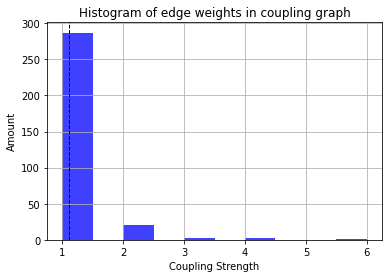

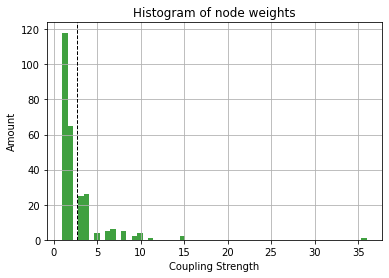

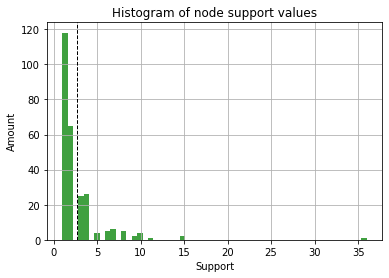

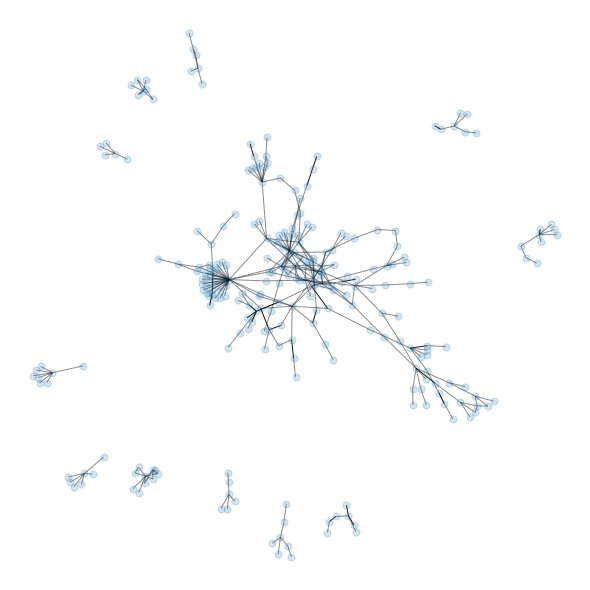



Using precalculated structural values
Using precalculated evolutionary values
Total node count: 158



Results:

Pattern 0 ([0, 1, 'unrelated functionality that gets adjusted together']):
  Amount of disagreements: 146 which is 0.58% of all edges


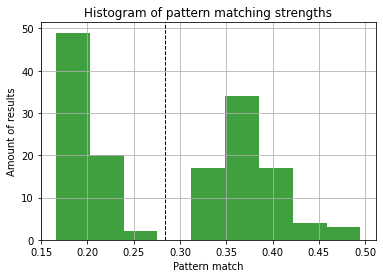

  Strong nontrivial disagreements: 146
   util/menu/Button.java/Button/constructor <> util/gfx/TextBoxView.java  -  0.49489795918367346
   logic/Laser.java <> logic/Player.java/Player  -  0.4791373849815408
   logic/Laser.java <> logic/Player.java  -  0.4791373849815408
   particles/ParticleEmitter.java/ParticleEmitter/getOutput <> logic/Player.java/Player  -  0.4467455621301775
   particles/ParticleEmitter.java/ParticleEmitter/getOutput <> logic/Player.java  -  0.4467455621301775
   util/geometry/Point.java/Point/plus <> logic/Asteroid.java  -  0.4288888888888889
   util/geometry/Point.java/Point/minus <> logic/Asteroid.java  -  0.4288888888888889
   particles/ParticleManager.java/ParticleManager/constructor <> particles/Particle.java  -  0.4167899408284024
   particles/ParticleManager.java/ParticleManager/emitters <> particles/Particle.java  -  0.4167899408284024
   util/geometry/Circle.java/Circle/constructor <> util/controls/Mouse.java  -  0.411865234375

Program is over!


In [3]:
views = ["structural"] # ["structural", "evolutionary", "linguistic"]
for repo in repos:
    r = LocalRepo(repo)
    print(pyfiglet.figlet_format(r.name))
    r.update()
    
    # pdb.set_trace()
    print("Nodes in project structure:", r.get_tree().node_count())
    
    for view in views:
        MetricManager.clear(r, view)

        coupling_graph = MetricManager.get(r, view)
        # coupling_graph.plaintext_save(repo)
        # coupling_graph.html_save(repo)
        

        print("\nResults from the " + view + " view:\n")

        coupling_graph.print_statistics()
        coupling_graph.print_most_linked_nodes()
        coupling_graph.show_weight_histogram()
        coupling_graph.visualize(use_spring=False, with_labels=False)
        print("\n")
        
    #analyze_disagreements([MetricManager.get(r, view) for view in ["structural", "evolutionary", "linguistic"]], [
    #    [0, 1, None, "unrelated functionality that gets adjusted together"],
    #    [0, 0, 1, "duplicated concepts, developed separately"],
    #    [None, 0, 1, "duplicated concepts, adjusted separately"],
    #    [1, None, 0, "weakly modularized code"]
    #])
    
    
    
    analyze_disagreements(r, [MetricManager.get(r, view) for view in ["structural", "evolutionary"]], [
        [0, 1, "unrelated functionality that gets adjusted together"],
    ])
    
print("\nProgram is over!")